In [82]:
import pandas as pd

In [83]:
#Read data
df_bookings = pd.read_csv('data/fact_bookings.csv')
df_date = pd.read_csv('data/dim_date.csv')
df_hotels = pd.read_csv('data/dim_hotels.csv')
df_rooms = pd.read_csv('data/dim_rooms.csv')
df_agg_bookings = pd.read_csv('data/fact_aggregated_bookings.csv')

**bookings data exploration**

In [84]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [85]:
#The number of rows and columns
df_bookings.shape

(134590, 12)

In [86]:
#Unique room_categories in bookings data
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [87]:
#Unique booking_platforms in bookings data
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [88]:
#count of the booking_platforms
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

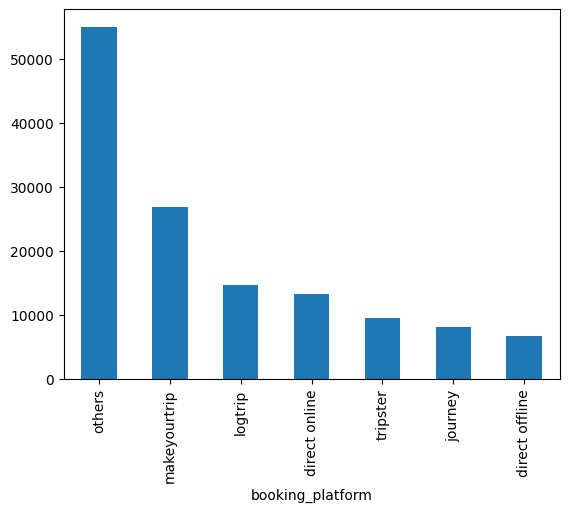

In [89]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

***df_bookings data cleaning***

In [90]:
#quick statistics on the numeric columns in this particular data frame
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [91]:
#checking how many negative values are in the column no_guests
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [92]:
#The number of rows and columns
df_bookings.shape

(134590, 12)

In [93]:
#keeping only positive records
df_bookings = df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [94]:
#Rows number after keeping the positive records
df_bookings.shape

(134578, 12)

In [95]:
#checking the revenue_generated column
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [96]:
#average revenue_generated value and standard deviation
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [97]:
#if the value is more than this it's considered as an outlier
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [98]:
#if the value is less than this it's considered as an outlier
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [99]:
#checking the negative values to detect the lower_limits
df_bookings[df_bookings.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [100]:
#checking the negative values to detect the higher_limits
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [101]:
#removing outliers
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings
#size of the df after outliers have been removed
df_bookings.shape

(134573, 12)

In [102]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [103]:
#handling NA values
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

**hotels data exploration**

In [104]:
#The number of rows and columns
df_hotels.shape

(25, 4)

In [105]:
df_hotels.head(10)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [106]:
#count of the hotels' categories
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [107]:
#the number of hotels in each city
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

<Axes: xlabel='city'>

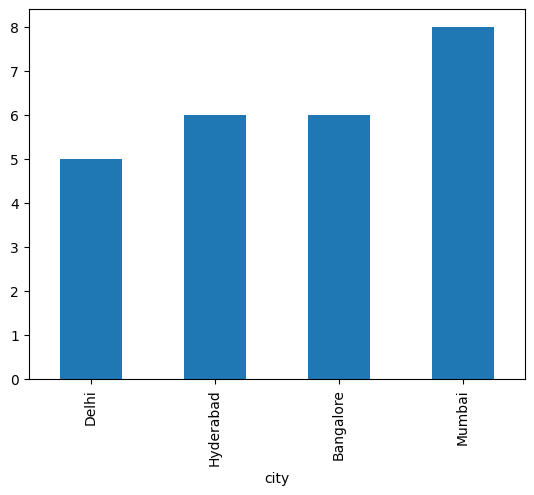

In [108]:
#bar chart of the number of hotels in each city 
df_hotels.city.value_counts().sort_values().plot(kind='bar')

<Axes: ylabel='city'>

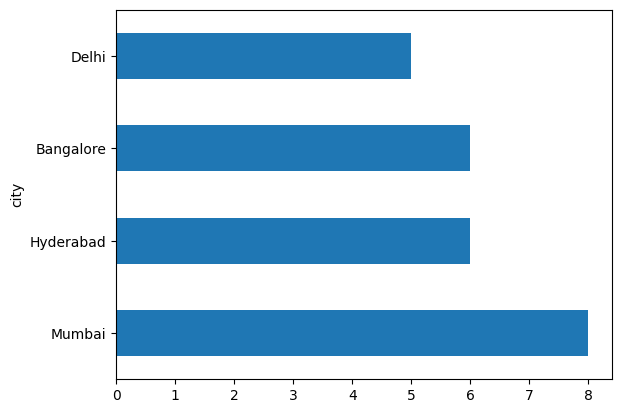

In [109]:
#horizontal bar chart of the number of hotels in each city 
df_hotels.city.value_counts().plot(kind="barh")

**aggregated_bookings data exploration**

In [110]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [111]:
#The number of rows and columns
df_agg_bookings.shape

(9200, 5)

In [112]:
#Unique property_id in agg_bookings data
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [113]:
# Days where bookings exceed capacity
overbooked_days = df_agg_bookings[df_agg_bookings['successful_bookings'] > df_agg_bookings['capacity']]
overbooked_days

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [114]:
#Total capacity per property
property_capacity = df_agg_bookings.groupby('property_id')['capacity'].sum().sort_values(ascending=False).reset_index()

print(property_capacity)

    property_id  capacity
0         18559   11776.0
1         17560   11316.0
2         16559   11132.0
3         18562   11132.0
4         16563   10764.0
5         19561   10764.0
6         19563   10120.0
7         18560   10028.0
8         19558    9844.0
9         18561    9844.0
10        17563    9568.0
11        17558    9384.0
12        17559    9292.0
13        19560    9108.0
14        16562    9016.0
15        17564    8924.0
16        18563    8924.0
17        19562    8832.0
18        19559    8740.0
19        16560    8740.0
20        18558    8372.0
21        17561    7794.0
22        17562    7616.0
23        16561    6716.0
24        16558    4784.0


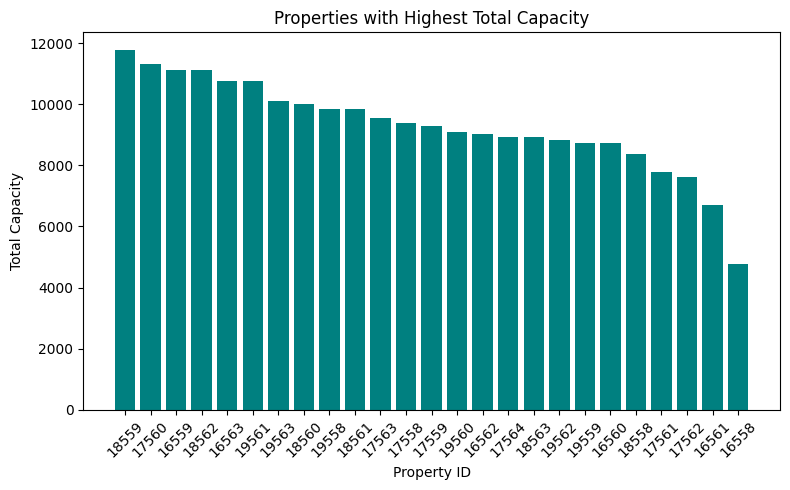

In [115]:
import matplotlib.pyplot as plt
# Plot of total capacity per property
plt.figure(figsize=(8, 5))
plt.bar(property_capacity['property_id'].astype(str), property_capacity['capacity'], color='teal')

plt.title('Properties with Highest Total Capacity')
plt.xlabel('Property ID')
plt.ylabel('Total Capacity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**aggregated_bookings data cleaning**

In [116]:
#handling NA values
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [127]:
#chacking the total rows wich are not null in capacity column
df_agg_bookings['capacity'].notnull().sum()

np.int64(9198)

In [121]:
# Keep only rows where capacity is not null for the capacity column
df_agg_bookings = df_agg_bookings[df_agg_bookings['capacity'].notnull()]

In [128]:
#The number of rows and columns of capacity after removing the null values
df_agg_bookings.shape

(9198, 5)

**data transformation**

In [130]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [132]:
#new column for the occupancy percentage
df_agg_bookings.loc[:, 'occ_pct'] = df_agg_bookings['successful_bookings'] / df_agg_bookings['capacity']

In [133]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [137]:
#occupancy percentage
df_agg_bookings.loc[:, 'occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


In [140]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9198 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9198 non-null   int64  
 1   check_in_date        9198 non-null   object 
 2   room_category        9198 non-null   object 
 3   successful_bookings  9198 non-null   int64  
 4   capacity             9198 non-null   float64
 5   occ_pct              9198 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 503.0+ KB


**insights generation** 

1.What is an average occupancy rate in each of the room categories?

In [148]:
#Each room catecory average occupancy
avg_occ = df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)
avg_occ

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [139]:
#we are getting more explicite info about room_category
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [141]:
#based on room_category and room_id columns we merged two data frames df_agg_bookings and df_rooms 
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [151]:
#Each room_class average occupancy
avg_occ = df.groupby("room_class")["occ_pct"].mean().round(2)
avg_occ

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [144]:
#getting rid off two same columns and leaving only one
df.drop("room_id", axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


C:\Users\Aliia\AppData\Local\Temp\ipykernel_10968\2816337776.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=avg_occ.index, y=avg_occ.values, palette="Blues_d")


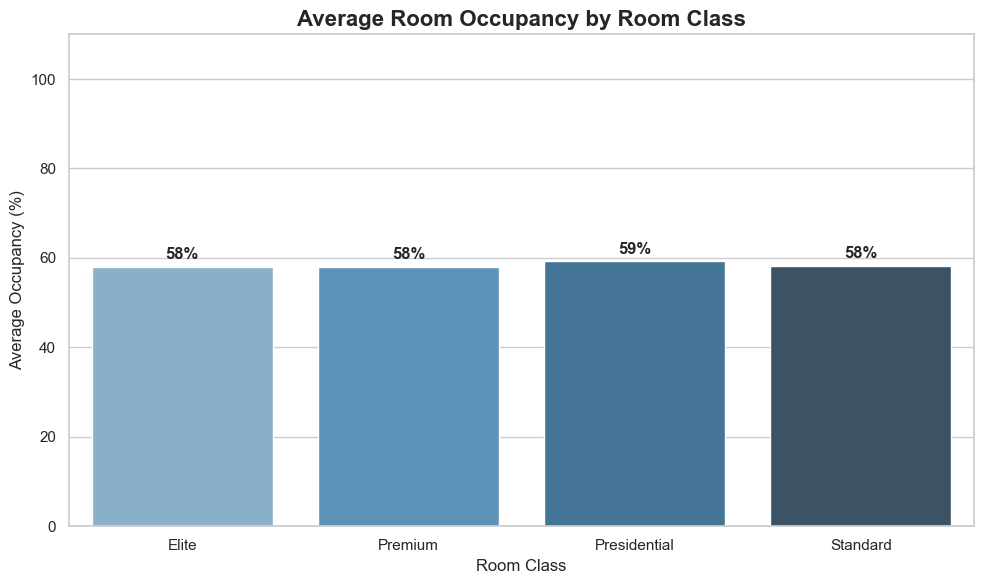

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=avg_occ.index, y=avg_occ.values, palette="Blues_d")

# Add data labels on top of bars
for index, value in enumerate(avg_occ.values):
    plt.text(index, value + 1, f"{value:.0f}%", ha='center', va='bottom', fontweight='bold')

# Titles and labels
plt.title("Average Room Occupancy by Room Class", fontsize=16, fontweight='bold')
plt.xlabel("Room Class", fontsize=12)
plt.ylabel("Average Occupancy (%)", fontsize=12)
plt.ylim(0, 110)  # Add some space above bars for labels

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#plt.savefig("avg_room_occupancy.png", dpi=300, bbox_inches="tight")


2.Print average occupancy rate per city

In [153]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [154]:
#joining two data frames based on property_id column
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore


In [159]:
#checking the average occupancy percentage by the city
avg_occ_city = df.groupby("city")["occ_pct"].mean()#.plot(kind="bar")
avg_occ_city

city
Bangalore    56.594207
Delhi        61.606467
Hyderabad    58.144651
Mumbai       57.936305
Name: occ_pct, dtype: float64

C:\Users\Aliia\AppData\Local\Temp\ipykernel_10968\1939322287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_occ_city.index, y=avg_occ_city.values, palette="mako")


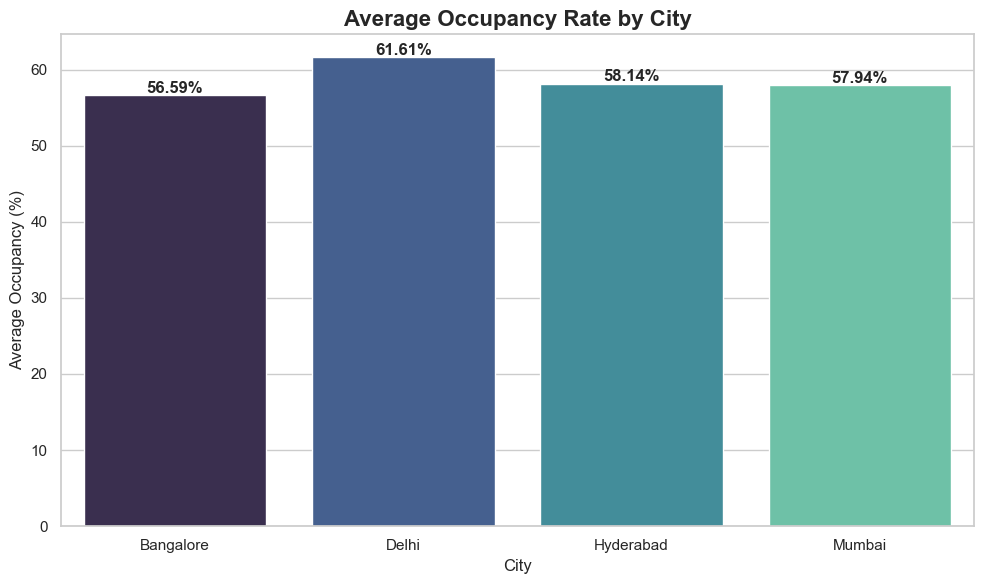

In [160]:
# Set style
sns.set(style="whitegrid")

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_occ_city.index, y=avg_occ_city.values, palette="mako")

# Add data labels
for i, value in enumerate(avg_occ_city.values):
    plt.text(i, value + 0.3, f"{value:.2f}%", ha='center', fontweight='bold')

# Customize appearance
plt.title("Average Occupancy Rate by City", fontsize=16, fontweight='bold')
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Occupancy (%)", fontsize=12)
plt.ylim(0, max(avg_occ_city.values) + 3)
plt.tight_layout()

# Show plot
plt.show()


3.When the occupancy better? Weekday or Weekend?

In [161]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,17558,1-May-22,RT1,30,19.0,157.89,Standard,Atliq Grands,Luxury,Mumbai
4,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi


In [162]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [163]:
#joining two data frames based on the chaeck_in date and date columns
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [164]:
#checking the average occupancy percentage by the weekday
avg_occ_weekday = df.groupby("day_type")["occ_pct"].mean().round(2)
avg_occ_weekday

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

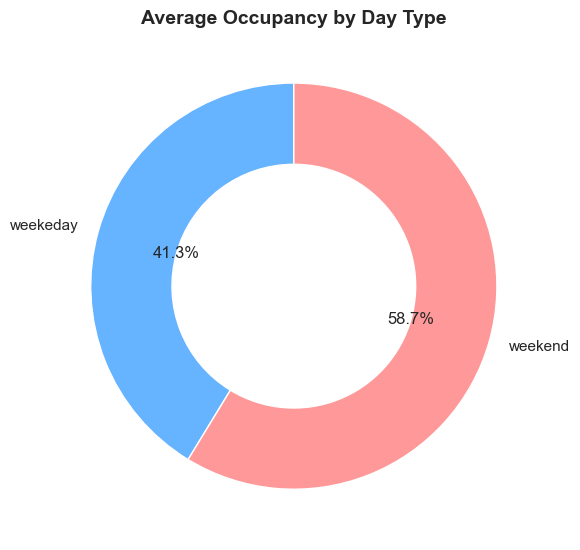

In [167]:
# Create labels and values from the Series
labels = avg_occ_weekday.index
sizes = avg_occ_weekday.values
colors = ['#66b3ff', '#ff9999']  # Customize if you like

# Create donut chart
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}  # this creates the donut effect
)

# Add a title
plt.title("Average Occupancy by Day Type", fontsize=14, fontweight='bold')

# Ensure the pie is a circle
plt.gca().set_aspect('equal')

# Display chart
plt.tight_layout()
plt.show()


In [194]:
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)  # only needed if you're in Jupyter Notebook

# Your data
avg_occ_weekday = df.groupby("day_type")["occ_pct"].mean().round(2)

# Plotly Pie (Donut) Chart
trace = go.Pie(
    labels=avg_occ_weekday.index,
    values=avg_occ_weekday.values,
    textfont=dict(size=20),
    opacity=0.8,
    hole=0.4,  # this turns it into a donut chart
    marker=dict(
        colors=['#66b3ff', '#ff9999'],  # adjust if you like
        line=dict(color='#000000', width=1.5)
    )
)

layout = dict(
    title='Average Occupancy by Day Type',
)

fig = dict(data=[trace], layout=layout)

py.iplot(fig)


C:\Users\Aliia\AppData\Local\Temp\ipykernel_10968\2422271653.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



4.In the month of June, what is the occupancy for different cities

In [176]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [177]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [178]:
#groupping our data fram by city
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

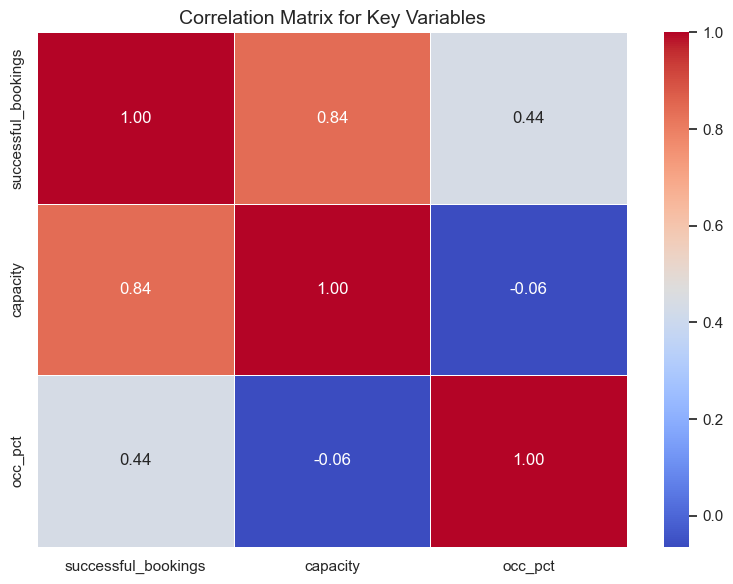

In [179]:
#relationships between different variables more deeply successful_bookings, capacity, occ_pct
# Selecting relevant columns
corr_data = df[['successful_bookings', 'capacity', 'occ_pct']]

# Correlation matrix
corr_matrix = corr_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Key Variables', fontsize=14)
plt.tight_layout()
plt.show()

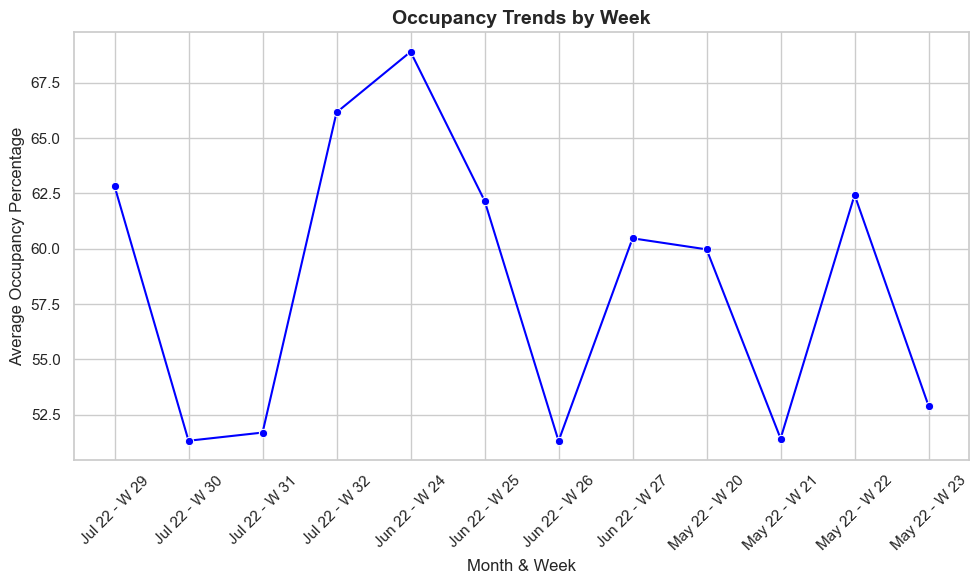

In [186]:
# Combine month and week into a single label
df['month_week'] = df['mmm yy'] + ' - ' + df['week no']

# Group by the new label
avg_occ_week = df.groupby('month_week')['occ_pct'].mean().round(2)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_occ_week.index, y=avg_occ_week.values, marker='o', color='blue')

plt.title('Occupancy Trends by Week', fontsize=14, fontweight='bold')
plt.xlabel('Month & Week', fontsize=12)
plt.ylabel('Average Occupancy Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Aliia\AppData\Local\Temp\ipykernel_10968\4231160954.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Aliia\AppData\Local\Temp\ipykernel_10968\4231160954.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




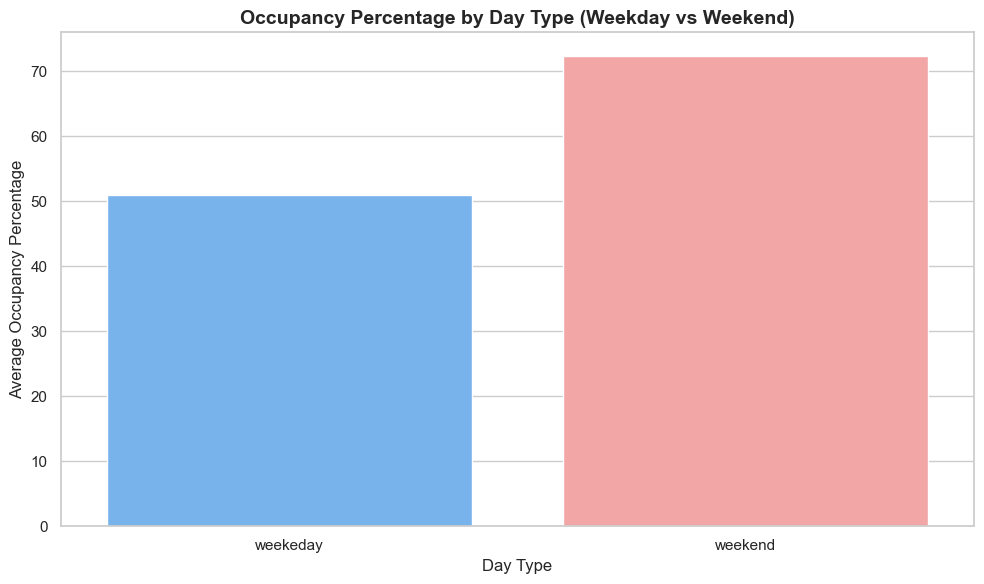

In [187]:
# 2. Occupancy Trends by Day Type (Weekday vs Weekend)
plt.figure(figsize=(10, 6))
avg_occ_day_type = df.groupby('day_type')['occ_pct'].mean().round(2)
sns.barplot(x=avg_occ_day_type.index, y=avg_occ_day_type.values, palette=['#66b3ff', '#ff9999'])

plt.title('Occupancy Percentage by Day Type (Weekday vs Weekend)', fontsize=14, fontweight='bold')
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Occupancy Percentage', fontsize=12)
plt.tight_layout()
plt.show()

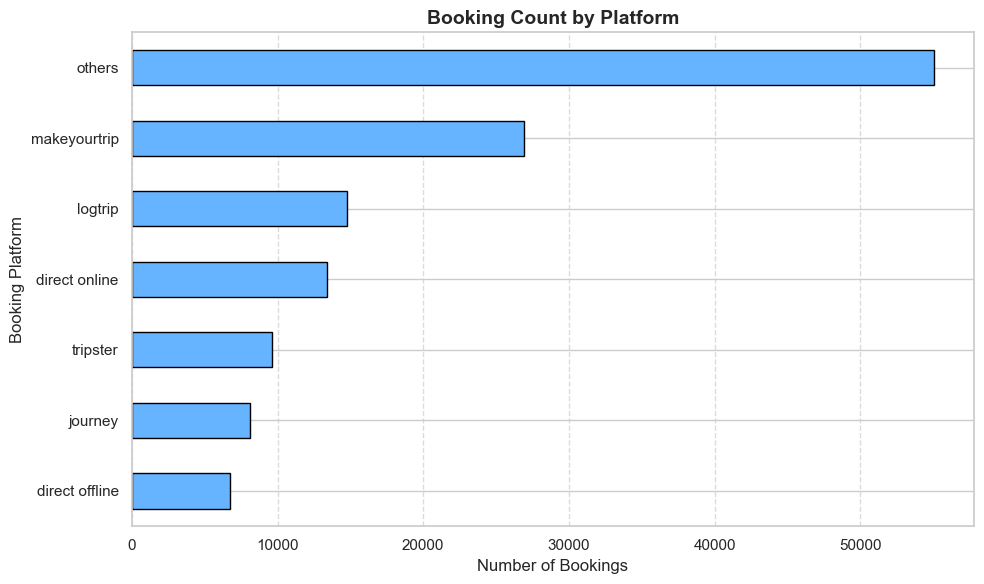

In [189]:
# Booking platform counts
platform_counts = df_bookings['booking_platform'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='barh', color='#66b3ff', edgecolor='black')

plt.title('Booking Count by Platform', fontsize=14, fontweight='bold')
plt.xlabel('Number of Bookings')
plt.ylabel('Booking Platform')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # To have the highest on top

plt.tight_layout()
plt.show()

C:\Users\Aliia\AppData\Local\Temp\ipykernel_10968\993756124.py:20: UserWarning:

Glyph 127976 (\N{HOTEL}) missing from font(s) Arial.

C:\Users\Aliia\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127976 (\N{HOTEL}) missing from font(s) Arial.



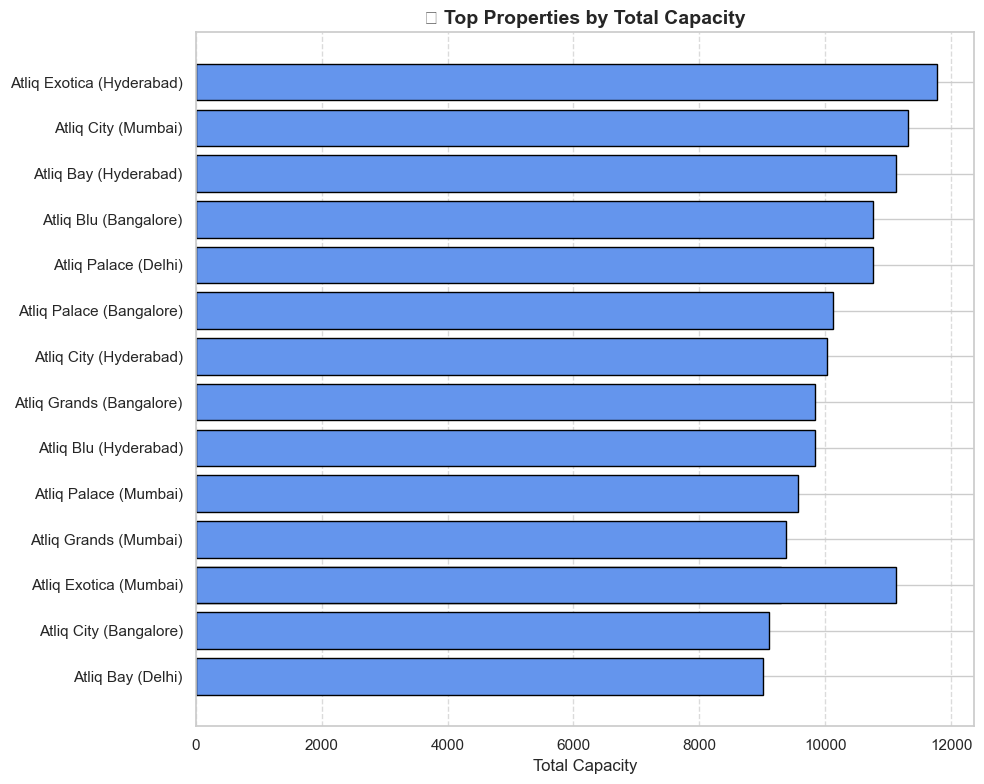

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Merge property capacity with hotel metadata
merged_capacity = property_capacity.merge(df_hotels, on='property_id', how='left')

# Step 2: Create a readable label
merged_capacity['label'] = merged_capacity['property_name'] + ' (' + merged_capacity['city'] + ')'

# Step 3: Sort and plot the top N if needed
top_n = 15
top_capacity = merged_capacity.head(top_n).sort_values(by='capacity', ascending=True)

# Step 4: Plotting
plt.figure(figsize=(10, 8))
plt.barh(top_capacity['label'], top_capacity['capacity'], color='#6495ED', edgecolor='black')
plt.xlabel('Total Capacity')
plt.title('🏨 Top Properties by Total Capacity', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


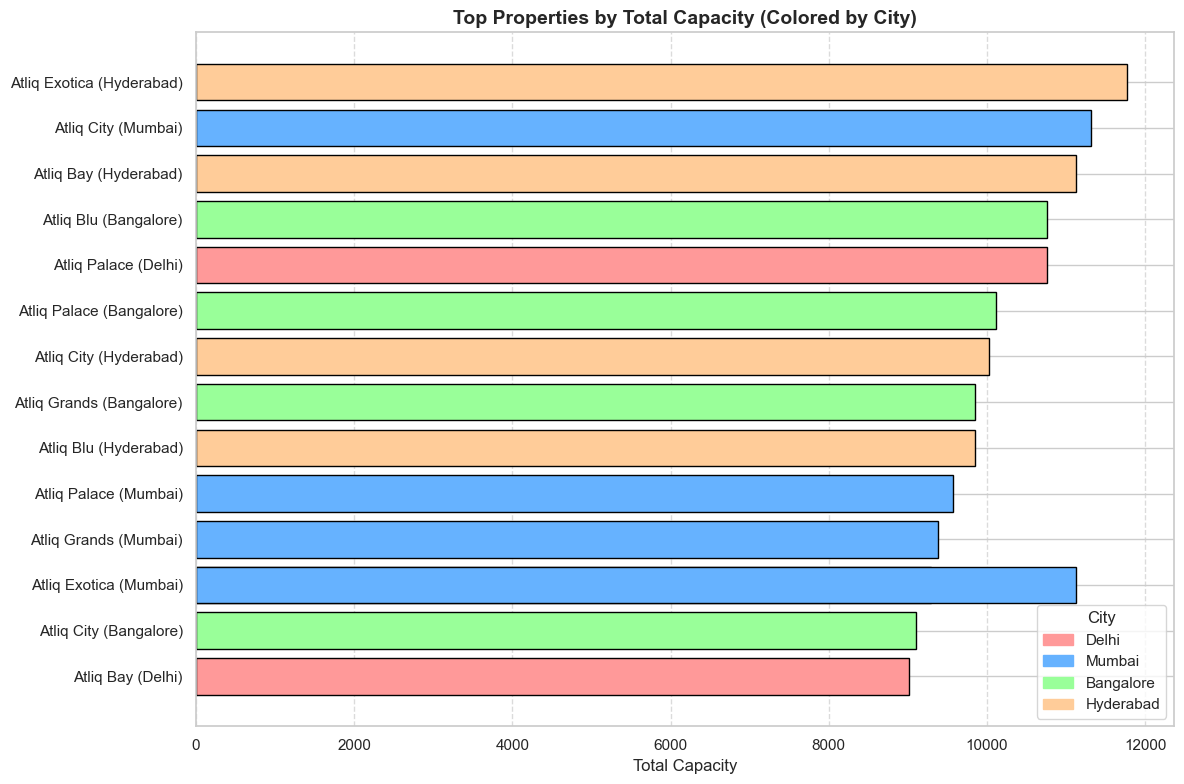

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge capacity data with hotel metadata
merged_capacity = property_capacity.merge(df_hotels, on='property_id', how='left')
merged_capacity['label'] = merged_capacity['property_name'] + ' (' + merged_capacity['city'] + ')'

# Sort and pick top N
top_n = 15
top_capacity = merged_capacity.head(top_n).sort_values(by='capacity', ascending=True)

# Assign colors by city
city_colors = {
    'Delhi': '#FF9999',
    'Mumbai': '#66B2FF',
    'Bangalore': '#99FF99',
    'Hyderabad': '#FFCC99'
}
colors = top_capacity['city'].map(city_colors)

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(top_capacity['label'], top_capacity['capacity'], color=colors, edgecolor='black')

# Add legend manually
handles = [plt.Rectangle((0,0),1,1, color=color) for color in city_colors.values()]
labels = city_colors.keys()
plt.legend(handles, labels, title='City', loc='lower right')

# Labels and title
plt.xlabel('Total Capacity')
plt.title('Top Properties by Total Capacity (Colored by City)', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
